## Load libraries & Data

In [140]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [141]:
df = pd.read_csv("/kaggle/input/speech-emotion-recognition/preprocessing.csv")

In [142]:
df

,ID,EMOTION,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,...,MFCC_95,MFCC_96,MFCC_97,MFCC_98,MFCC_99,MFCC_100,MFCC_101,MFCC_102,MFCC_103,MFCC_104
0,1.wav,ANGER,7.173747,6.241284,-5.657553,-10.723357,9.774400,-1.337435,-20.305928,21.899439,...,-83.034785,17.133476,-39.050202,0.937981,22.279114,-32.149452,16.360696,-45.627288,8.464833,4.810537
1,10.wav,ANGER,18.253546,33.827928,-0.394876,-34.552283,0.881776,-4.144483,8.825235,-28.961833,...,-7.289952,14.707808,6.462685,-47.924610,-1.140001,-30.475375,-3.356237,-1.035939,27.817346,-2.396575
2,12.wav,ANGER,17.541629,14.533580,-16.326325,-17.575700,18.397393,-39.945046,19.332805,-16.716750,...,-5.277370,-37.037064,19.569758,8.352134,-26.257375,7.966853,6.396199,1.820512,-17.300854,-9.436276
3,128.wav,ANGER,10.862423,20.274959,10.505929,-10.277304,-11.221764,-7.286065,17.480850,1.574184,...,-32.535377,-9.154723,-69.199498,-6.796576,-6.444395,-127.882281,7.643235,-41.617706,4.299484,-2.261805
4,129.wav,ANGER,12.087691,24.870030,11.422343,-12.865743,-8.358586,-2.403882,24.893325,5.147820,...,-27.800629,28.745942,-15.464664,-5.505945,3.408287,-79.380369,7.806198,-33.190364,6.750780,-3.671986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,340.wav,SURPRISE,15.226563,0.186233,-3.281283,-24.740938,25.617716,-45.073903,13.314547,-2.170590,...,-2.682725,50.882203,-134.806395,-18.595183,-33.443419,-105.131553,2.482604,-23.680847,6.378742,2.976091
325,352.wav,SURPRISE,12.600863,2.510442,-5.616097,-19.489343,39.047921,-38.119601,11.272304,6.342180,...,60.358138,-3.520503,-12.044740,20.733964,-46.860828,11.973172,20.243802,20.941377,52.354559,3.559320
326,359.wav,SURPRISE,16.066415,11.945374,7.728273,-19.356915,25.335920,-33.402655,14.496152,-10.672076,...,27.903956,72.101730,-33.940819,-18.213185,-36.874427,-23.128806,10.358896,-13.144257,-9.762749,8.612246
327,98.wav,SURPRISE,18.744282,12.345046,-0.948610,-23.508525,18.077760,-3.043768,-25.547541,15.402081,...,-9.039049,5.365981,-44.187845,-6.186139,3.834048,-31.058916,4.618531,-2.190681,2.379540,2.741503


In [143]:
df.head()

,ID,EMOTION,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,...,MFCC_95,MFCC_96,MFCC_97,MFCC_98,MFCC_99,MFCC_100,MFCC_101,MFCC_102,MFCC_103,MFCC_104
0,1.wav,ANGER,7.173747,6.241284,-5.657553,-10.723357,9.774400,-1.337435,-20.305928,21.899439,...,-83.034785,17.133476,-39.050202,0.937981,22.279114,-32.149452,16.360696,-45.627288,8.464833,4.810537
1,10.wav,ANGER,18.253546,33.827928,-0.394876,-34.552283,0.881776,-4.144483,8.825235,-28.961833,...,-7.289952,14.707808,6.462685,-47.924610,-1.140001,-30.475375,-3.356237,-1.035939,27.817346,-2.396575
2,12.wav,ANGER,17.541629,14.533580,-16.326325,-17.575700,18.397393,-39.945046,19.332805,-16.716750,...,-5.277370,-37.037064,19.569758,8.352134,-26.257375,7.966853,6.396199,1.820512,-17.300854,-9.436276
3,128.wav,ANGER,10.862423,20.274959,10.505929,-10.277304,-11.221764,-7.286065,17.480850,1.574184,...,-32.535377,-9.154723,-69.199498,-6.796576,-6.444395,-127.882281,7.643235,-41.617706,4.299484,-2.261805
4,129.wav,ANGER,12.087691,24.870030,11.422343,-12.865743,-8.358586,-2.403882,24.893325,5.147820,...,-27.800629,28.745942,-15.464664,-5.505945,3.408287,-79.380369,7.806198,-33.190364,6.750780,-3.671986


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Columns: 106 entries, ID to MFCC_104
dtypes: float64(104), object(2)
memory usage: 272.6+ KB


In [145]:
numeric_data = df.select_dtypes(include=[float])  # Select only columns with float data type
correlation_matrix = numeric_data.corr()

In [146]:
df['EMOTION'].unique()

array(['ANGER', 'FEAR', 'HAPPY', 'NEUTRAL', 'SAD', 'SURPRISE'],
      dtype=object)

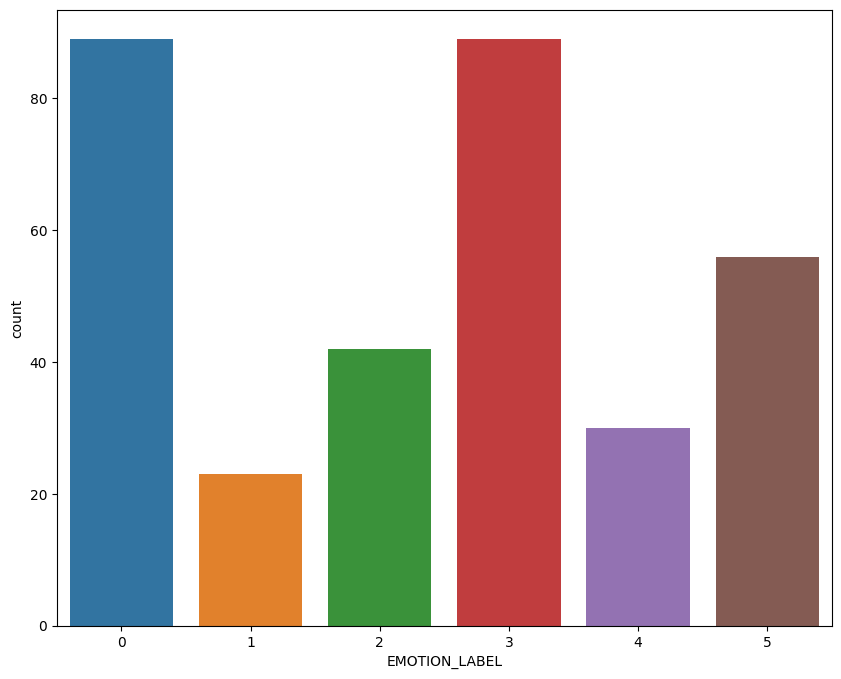

In [147]:
# Create a mapping of emotions to numerical labels
emotion_mapping = {'ANGER': 0, 'FEAR': 1, 'HAPPY': 2, 'NEUTRAL': 3, 'SAD': 4, 'SURPRISE': 5}

# Create a new column with numerical labels
df['EMOTION_LABEL'] = df['EMOTION'].map(emotion_mapping)

# Now you can create a countplot using the numerical labels
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='EMOTION_LABEL')
plt.show()

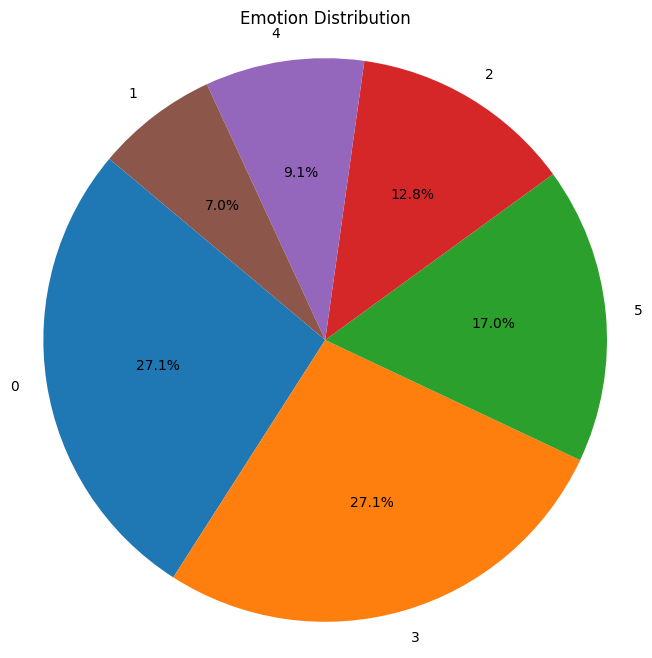

In [166]:
import matplotlib.pyplot as plt

# Create a mapping of emotions to numerical labels
emotion_mapping = {'ANGER': 0, 'FEAR': 1, 'HAPPY': 2, 'NEUTRAL': 3, 'SAD': 4, 'SURPRISE': 5}

# Create a new column with numerical labels
df['EMOTION_LABEL'] = df['EMOTION'].map(emotion_mapping)

# Count the occurrences of each numerical label
label_counts = df['EMOTION_LABEL'].value_counts()

# Create a pie chart to visualize the distribution
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Emotion Distribution")
plt.show()


In [148]:
emotion_counts = {}

In [149]:
for emotion in df['EMOTION']:
    if emotion in emotion_counts:
        emotion_counts[emotion] += 1
    else:
        emotion_counts[emotion] = 1

In [150]:
for emotion, count in emotion_counts.items():
    print(f"{emotion}: {count}")

ANGER: 89
FEAR: 23
HAPPY: 42
NEUTRAL: 89
SAD: 30
SURPRISE: 56


In [151]:
df.isnull().sum().sum()

0

In [152]:
missing_values = df.isnull().sum()
print(missing_values)

ID               0
EMOTION          0
MFCC_1           0
MFCC_2           0
MFCC_3           0
                ..
MFCC_101         0
MFCC_102         0
MFCC_103         0
MFCC_104         0
EMOTION_LABEL    0
Length: 107, dtype: int64


In [153]:
X = df.drop(['EMOTION','ID'], axis = 1)
y = df['EMOTION']

In [154]:
X.head()

,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,MFCC_10,...,MFCC_96,MFCC_97,MFCC_98,MFCC_99,MFCC_100,MFCC_101,MFCC_102,MFCC_103,MFCC_104,EMOTION_LABEL
0,7.173747,6.241284,-5.657553,-10.723357,9.774400,-1.337435,-20.305928,21.899439,-16.919055,-7.200952,...,17.133476,-39.050202,0.937981,22.279114,-32.149452,16.360696,-45.627288,8.464833,4.810537,0
1,18.253546,33.827928,-0.394876,-34.552283,0.881776,-4.144483,8.825235,-28.961833,1.065646,-13.864306,...,14.707808,6.462685,-47.924610,-1.140001,-30.475375,-3.356237,-1.035939,27.817346,-2.396575,0
2,17.541629,14.533580,-16.326325,-17.575700,18.397393,-39.945046,19.332805,-16.716750,-6.195627,6.128445,...,-37.037064,19.569758,8.352134,-26.257375,7.966853,6.396199,1.820512,-17.300854,-9.436276,0
3,10.862423,20.274959,10.505929,-10.277304,-11.221764,-7.286065,17.480850,1.574184,-8.579302,-10.593870,...,-9.154723,-69.199498,-6.796576,-6.444395,-127.882281,7.643235,-41.617706,4.299484,-2.261805,0
4,12.087691,24.870030,11.422343,-12.865743,-8.358586,-2.403882,24.893325,5.147820,-1.996145,-9.458739,...,28.745942,-15.464664,-5.505945,3.408287,-79.380369,7.806198,-33.190364,6.750780,-3.671986,0


In [155]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Columns: 105 entries, MFCC_1 to EMOTION_LABEL
dtypes: float64(104), int64(1)
memory usage: 270.0 KB


In [156]:
print("Total number of labels: {}".format(df.shape[0]))

Total number of labels: 329


In [157]:
target = df.ID

In [158]:
X.dtypes.sample()

MFCC_104    float64
dtype: object

In [159]:
one_hot_encoded_training_predictors = pd.get_dummies(X)
one_hot_encoded_test_predictors = pd.get_dummies(y)
final_train, final_test = one_hot_encoded_training_predictors.align(one_hot_encoded_test_predictors,join='left', axis=1)

In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler to scale your data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a LogisticRegression model with an increased max_iter
m1 = LogisticRegression(max_iter=1000)

# Fit the model on the scaled data
m1.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
pred1 = m1.predict(X_test_scaled)


In [162]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

       ANGER       0.95      0.86      0.90        21
        FEAR       0.33      0.33      0.33         3
       HAPPY       0.67      0.60      0.63        10
     NEUTRAL       0.77      0.89      0.83        19
         SAD       0.62      0.71      0.67         7
    SURPRISE       0.80      0.67      0.73         6

    accuracy                           0.77        66
   macro avg       0.69      0.68      0.68        66
weighted avg       0.78      0.77      0.77        66



In [163]:
labels = ['ANGRY','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE']
cm1 = pd.DataFrame(confusion_matrix(y_test, pred1), index = labels, columns = labels)

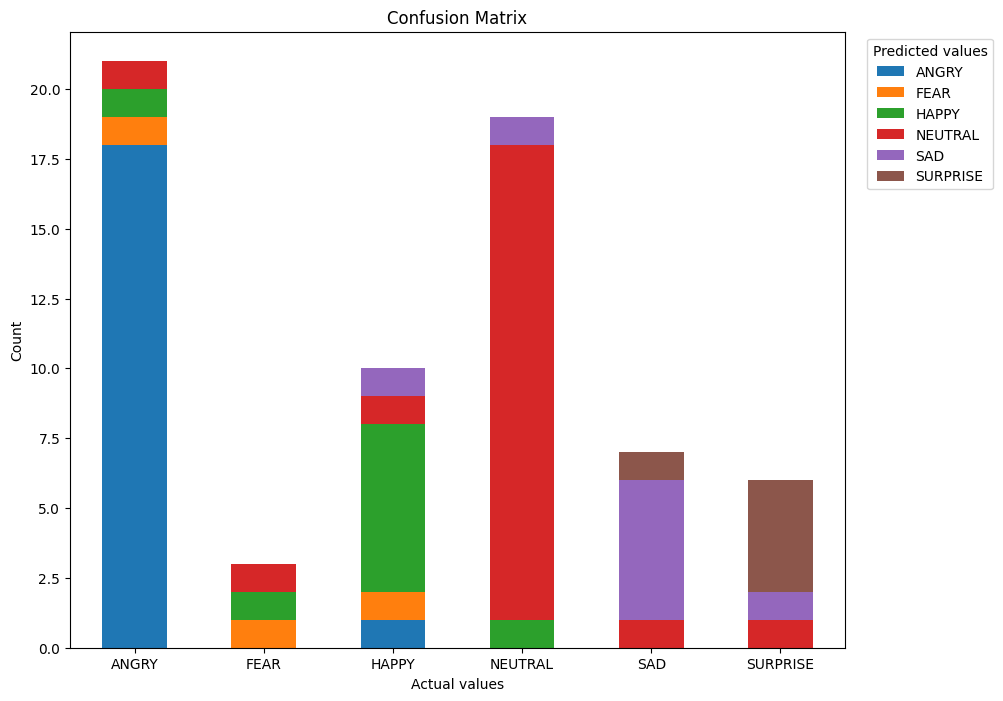

In [164]:
# Your confusion matrix (cm1) and labels
labels = ['ANGRY', 'FEAR', 'HAPPY', 'NEUTRAL', 'SAD', 'SURPRISE']

# Create a DataFrame from your confusion matrix
cm1_df = pd.DataFrame(cm1, index=labels, columns=labels)

# Plot the confusion matrix as a stacked bar chart
cm1_df.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.xlabel('Actual values')
plt.ylabel('Count')
plt.title('Confusion Matrix')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=0)
plt.legend(title='Predicted values', loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()

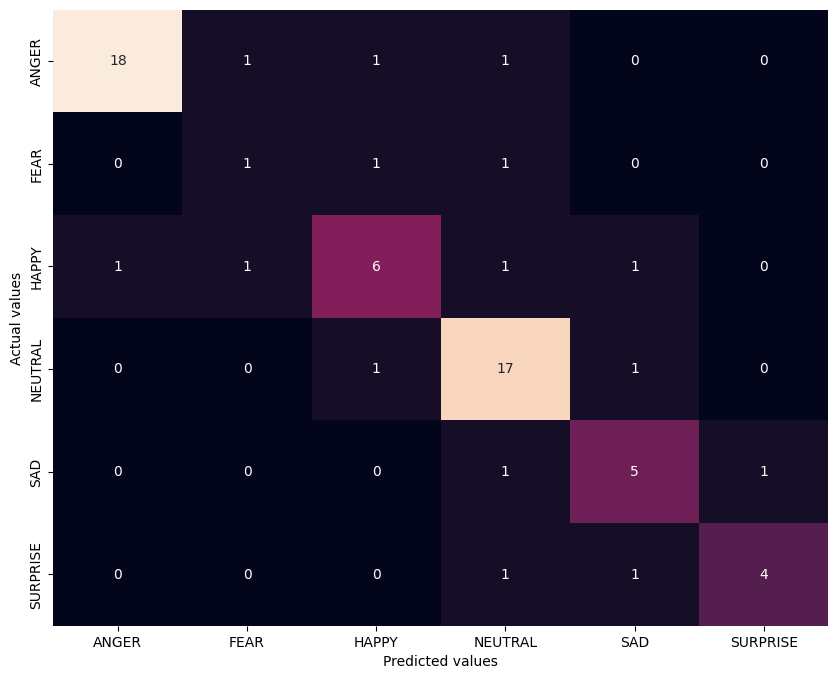

Classification Report:
               precision    recall  f1-score   support

       ANGER       0.95      0.86      0.90        21
        FEAR       0.33      0.33      0.33         3
       HAPPY       0.67      0.60      0.63        10
     NEUTRAL       0.77      0.89      0.83        19
         SAD       0.62      0.71      0.67         7
    SURPRISE       0.80      0.67      0.73         6

    accuracy                           0.77        66
   macro avg       0.69      0.68      0.68        66
weighted avg       0.78      0.77      0.77        66



In [165]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define the emotion labels
labels = ['ANGER', 'FEAR', 'HAPPY', 'NEUTRAL', 'SAD', 'SURPRISE']

# Create a confusion matrix
cm1 = confusion_matrix(y_test, pred1)

# Create a classification report
classification_rep = classification_report(y_test, pred1, target_names=labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm1, annot=True, cbar=False, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

# Display the classification report
print("Classification Report:\n", classification_rep)
